# Titanic Dataset Preprocessing


In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#Importing Tuner and required files
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

In [159]:
training_set = pd.read_csv('/content/drive/MyDrive/Sem 1/Data Mining/Hw1/Titanic Dataset/train.csv')
test_set = pd.read_csv('/content/drive/MyDrive/Sem 1/Data Mining/Hw1/Titanic Dataset/test.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here we can see that we have many categorical features and some numeric ones too. Before turning this dataset into vectors of numbers that our classification algorithms can use, we should deal with missing values.
Let's check how many missing values has our dataset per feature.

In [160]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [161]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [162]:
# make a list of all the posible Decks, the last element is used when no cabin code is present
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
#define a function that replaces the cabin code with the deck character
def search_substring(big_string, substring_list):
    for substring in substring_list:
        if substring in big_string:
            return substring
    return substring_list[-1]

We have a similar problem with the Name feature, we have too much information that is hard to encode and nt useful. So we can take only the title of the name for each person, lets define a function for that.

In [163]:
# replace passenger's name with his/her title (Mr, Mrs, Miss, Master)
def get_title(string):
    import re
    regex = re.compile(r'Mr|Don|Major|Capt|Jonkheer|Rev|Col|Dr|Mrs|Countess|Dona|Mme|Ms|Miss|Mlle|Master', re.IGNORECASE)
    results = regex.search(string)
    if results != None:
        return(results.group().lower())
    else:
        return(str(np.nan))

In [164]:
# dictionary to map to generate the new feature vector
title_dictionary = {
    "capt":"Officer",
    "col":"Officer",
    "major":"Officer",
    "dr":"Officer",
    "jonkheer":"Royalty",
    "rev":"Officer",
    "countess":"Royalty",
    "dona":"Royalty",
    "lady":"Royalty",
    "don":"Royalty",
    "mr":"Mr",
    "mme":"Mrs",
    "ms":"Mrs",
    "mrs":"Mrs",
    "miss":"Miss",
    "mlle":"Miss",
    "master":"Master",
    "nan":"Mr"
}

Now that we have the functions we need, lets apply them and create the features Title and Deck

In [165]:
training_set['Deck'] = training_set['Cabin'].map(lambda x: search_substring(str(x), cabin_list))
test_set['Deck'] = test_set['Cabin'].map(lambda x: search_substring(str(x), cabin_list))
# delete the Cabin feature
training_set.drop('Cabin', 1, inplace=True)
test_set.drop('Cabin', 1, inplace=True)

training_set['Title'] = training_set['Name'].apply(get_title)
test_set['Title'] = test_set['Name'].apply(get_title)
training_set['Title'] = training_set['Title'].map(title_dictionary)
test_set['Title'] = test_set['Title'].map(title_dictionary)
# delete the Name feature
training_set.drop('Name', 1, inplace=True)
test_set.drop('Name', 1, inplace=True)

<ipython-input-165-b842e7bf8073>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  training_set.drop('Cabin', 1, inplace=True)
<ipython-input-165-b842e7bf8073>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_set.drop('Cabin', 1, inplace=True)
<ipython-input-165-b842e7bf8073>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  training_set.drop('Name', 1, inplace=True)
<ipython-input-165-b842e7bf8073>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_set.drop('Name', 1, inplace=True)


Let's take a look at the results we got

In [166]:
training_set.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
886,887,0,2,male,27.0,0,0,211536,13.00,S,Unknown,Officer
887,888,1,1,female,19.0,0,0,112053,30.00,S,B,Miss
888,889,0,3,female,NaN,1,2,W./C. 6607,23.45,S,Unknown,Miss
889,890,1,1,male,26.0,0,0,111369,30.00,C,C,Mr
890,891,0,3,male,32.0,0,0,370376,7.75,Q,Unknown,Mr


Now we will drop the Ticket feature that does not really give much insight.

In [167]:
#dropping ticket column
training_set.drop('Ticket', 1, inplace=True)
test_set.drop('Ticket', 1, inplace=True)

<ipython-input-167-abe1248b5a04>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  training_set.drop('Ticket', 1, inplace=True)
<ipython-input-167-abe1248b5a04>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_set.drop('Ticket', 1, inplace=True)


We have to do something about the NaN values in the Age column. We can replace them with the mean of the age, but that would mean that some kid (Master or Miss) would appear to be older than they are. So we will take the mean of the age from each Title, and then replace each NaN value with the mean of the age of the corresponding persons title.

In [168]:
means_title = training_set.groupby('Title')['Age'].mean()

In [169]:
title_list = ['Mr','Miss','Mrs','Master', 'Royalty', 'Officer']
def age_nan_replace(means, dframe, title_list):
    for title in title_list:
        temp = dframe['Title'] == title #extract indices of samples with same title
        dframe.loc[temp, 'Age'] = dframe.loc[temp, 'Age'].fillna(means[title]) # replace nan values for mean


age_nan_replace(means_title, training_set, title_list)
age_nan_replace(means_title, test_set, title_list)

Now lets fill those two NaN cases in the Embarked column.

<Axes: xlabel='Embarked'>

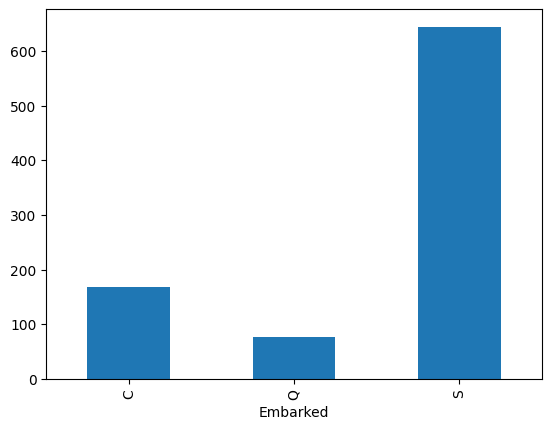

In [170]:
training_set.groupby('Embarked').size().plot(kind='bar')

We will assgn them the letter S which is the most common case.

In [171]:
training_set['Embarked'].fillna('S', inplace=True)
test_set['Embarked'].fillna('S', inplace=True)
#fill the fare column in the test set
test_set['Fare'].fillna(test_set['Fare'].mean(), inplace=True)

In [172]:
training_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Unknown,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,C,Mr
2,3,1,3,female,26.0,0,0,7.9250,S,Unknown,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,C,Mr
4,5,0,3,male,35.0,0,0,8.0500,S,Unknown,Mr


Let's visualize some aspects of the data so that we can understand what are the most important factors that determined survival.

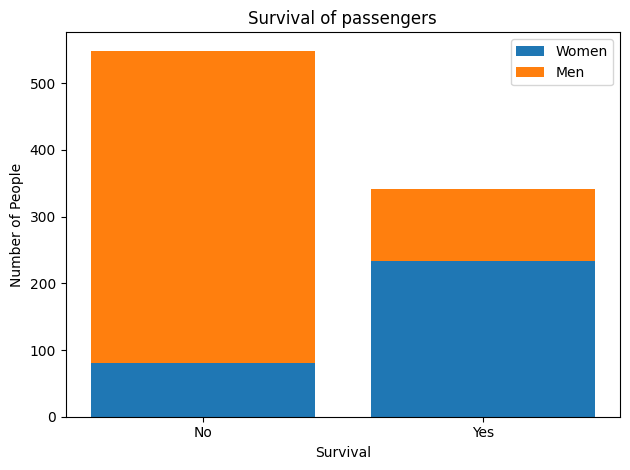

In [173]:
index = training_set['Survived'].unique() # get the number of bars
grouped_data = training_set.groupby(['Survived', 'Sex'])
temp = grouped_data.size().unstack()
women_stats = (temp.iat[0,0], temp.iat[1,0])
men_stats = (temp.iat[0,1], temp.iat[1,1])
p1 = plt.bar(index, women_stats)
p2 = plt.bar(index, men_stats, bottom=women_stats)
plt.xticks(index, ('No', 'Yes'))
plt.ylabel('Number of People')
plt.xlabel('Survival')
plt.title('Survival of passengers')
plt.legend((p1[0], p2[0]), ('Women', 'Men'))
plt.tight_layout()


<Axes: xlabel='Sex'>

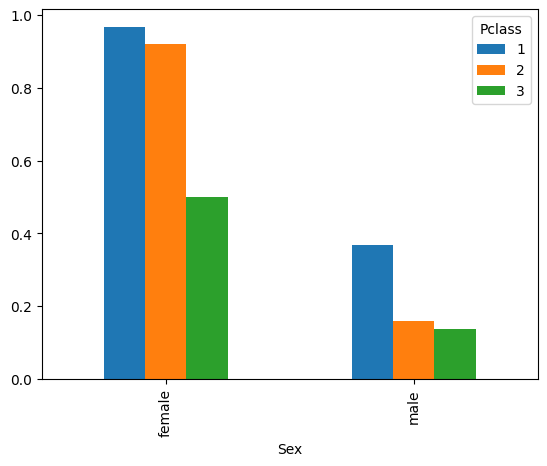

In [174]:
training_set.pivot_table('Survived',index='Sex',columns='Pclass').plot(kind='bar')


<Axes: xlabel='Title'>

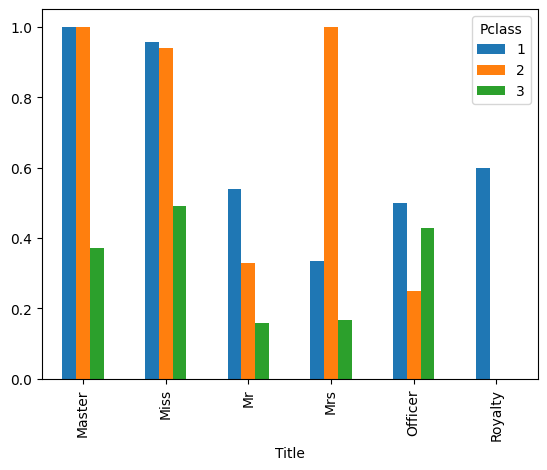

In [175]:
training_set.pivot_table('Survived', index='Title', columns='Pclass').plot(kind='bar')

<Axes: xlabel='Sex,Age'>

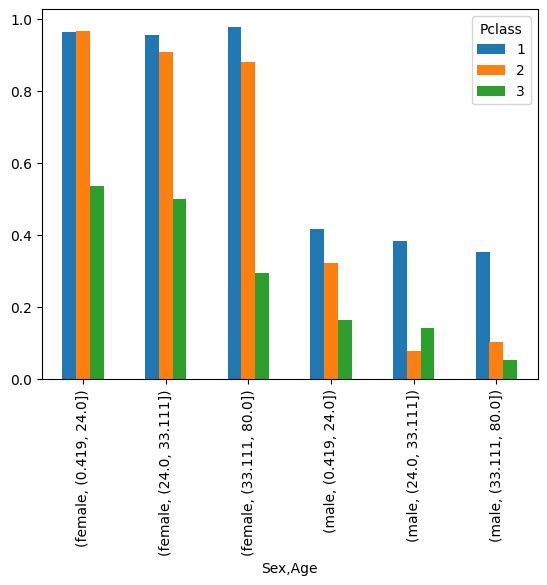

In [176]:
age_intervals = pd.qcut(training_set['Age'], 3)
training_set.pivot_table('Survived', ['Sex', age_intervals], 'Pclass').plot(kind='bar')

<Axes: xlabel='Parch'>

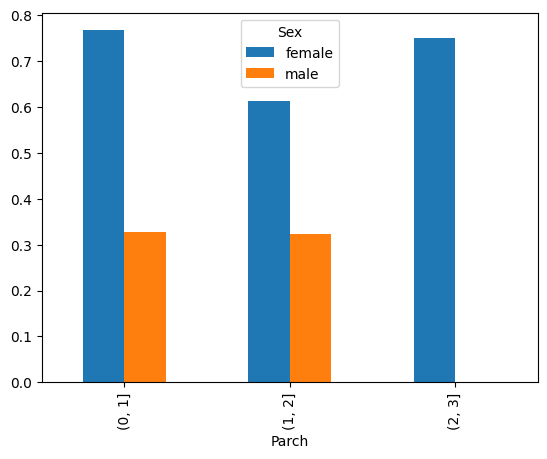

In [177]:
parch_intervals = pd.cut(training_set['Parch'], [0,1,2,3])
sibsp_intervals = pd.cut(training_set['SibSp'], [0,1,2,3])
training_set.pivot_table('Survived', parch_intervals, 'Sex').plot(kind='bar')

<Axes: xlabel='SibSp'>

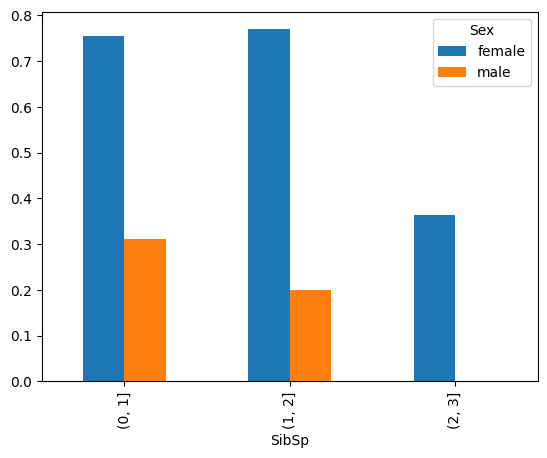

In [178]:
training_set.pivot_table('Survived', sibsp_intervals, 'Sex').plot(kind='bar')

What we can take from this analysis is that Passenger Class was relevant to survive, and that the features SibSp and Parch behave similarly. We can make a new feature called Family Size that is the sum of those 2 feature columns.

In [179]:
training_set['Family Size'] = training_set['Parch'] + training_set['SibSp']
test_set['Family Size'] = test_set['Parch'] + test_set['SibSp']
training_set.drop('Parch', axis=1, inplace=True)
training_set.drop('SibSp', axis=1, inplace=True)
test_set.drop('Parch', axis=1, inplace=True)
test_set.drop('SibSp', axis=1, inplace=True)
training_set.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title,Family Size
0,1,0,3,male,22.0,7.2500,S,Unknown,Mr,1
1,2,1,1,female,38.0,71.2833,C,C,Mr,1
2,3,1,3,female,26.0,7.9250,S,Unknown,Miss,0
3,4,1,1,female,35.0,53.1000,S,C,Mr,1
4,5,0,3,male,35.0,8.0500,S,Unknown,Mr,0


Let's standardize the numerical features Age and Fare

In [180]:
from sklearn.preprocessing import StandardScaler

numericals_list = ['Age','Fare']
for column in numericals_list:
    sc = StandardScaler(with_mean=True, with_std=True)
#    print(training_set[column].size)
#    print(test_set[column].size)
    sc.fit(training_set[column].values.reshape(-1,1))
    training_set[column] = sc.transform(training_set[column].values.reshape(-1,1))
    test_set[column] = sc.transform(test_set[column].values.reshape(-1,1))


Now let's encode categorical classes with sklearn's LabelEncoder

In [181]:
from sklearn.preprocessing import LabelEncoder
categorical_classes_list = ['Sex','Embarked','Deck', 'Title'] #Pclass is already encoded
#encode features that are cateorical classes
encoding_list = []
for column in categorical_classes_list:
    le = LabelEncoder()
    le.fit(training_set[column])
    encoding_list.append(training_set[column].unique())
    encoding_list.append(list(le.transform(training_set[column].unique())))
    training_set[column] = le.transform(training_set[column])
    test_set[column] = le.transform(test_set[column])

In [182]:
# lets see the results
training_set.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title,Family Size
0,1,0,3,1,-0.587428,-0.502445,2,8,2,1
1,2,1,1,0,0.617618,0.786845,0,2,2,1
2,3,1,3,0,-0.286167,-0.488854,2,8,1,0
3,4,1,1,0,0.391672,0.420730,2,2,2,1
4,5,0,3,1,0.391672,-0.486337,2,8,2,0


Now we are going to onehot encode categorical features such as Embarked, Title and Pclass

In [183]:
training_set = pd.get_dummies(training_set, columns=['Embarked','Pclass','Title', 'Deck'])
test_set = pd.get_dummies(test_set, columns=['Embarked','Pclass','Title', 'Deck'])


The test set lacks a sample where deck 7 is selected so we will have to align the dataframes to fill that column.

In [184]:
training_set, test_set = training_set.align(test_set, axis=1)
test_set.drop('Survived', axis=1, inplace=True)
test_set.fillna(0, axis=1, inplace=True)

Now that we have our dataset clean and ready, we need to transform it into a numpy matrix that a learning algorithm can use.
We will get a Y vector containing the labels for training, a matrix X that has all the features for training, and X_test that has all the samples for training from the test set.

In [185]:
#test_set.fillna(0, inplace=True)
Y_train = training_set['Survived'].values
X_train = training_set.drop(['Survived','PassengerId'], axis=1).values
X_test = test_set.drop('PassengerId', axis=1).values


In [186]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

83.28

In [187]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print("Before Tuning : ",acc_svc)


Before Tuning :  83.73


In [188]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.31

In [189]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

74.41

In [190]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.0

In [191]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


83.61

In [192]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

73.06

In [193]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, Y_train) * 100
print("Before Tuning :",acc_decision_tree)

# #------------MY CODE----------------------
# clf = DecisionTreeClassifier(random_state=42)
# params = {
#     'max_depth': np.arange(5,30),
#     'min_samples_leaf': [5, 10, 20, 50, 100],
#     'criterion': ["gini", "entropy"]
# }
# grid_search = GridSearchCV(estimator=clf,
#                            param_grid=params,
#                            cv=6)
# grdtc = grid_search.fit(X_train, Y_train)
# predictiondtc = grdtc.predict(X_test)
# best=grid_search.best_estimator_
# predictions_dtc = best.predict(X_train)
# print(best)
# #We get the following hyperparameters after using GridSearchCV
# # print("Accuracy:",metrics.accuracy_score(X_test,best.predict(X_test)))
# # print("F1 Score:",metrics.f1_score(X_test,best.predict(X_test)))
# gc_dtc = round(decision_tree.score(X_train, predictions_dtc) * 100, 2)
# print("After Tuning :",gc_dtc)

Before Tuning : 98.87766554433222


In [194]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Before Tuning : ",acc_random_forest)

# #------------My Code-----------------------------
# params = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# # Create a new RandomForestClassifier instance for tuning
# random_forest_tuned = RandomForestClassifier()

# # Perform GridSearchCV
# grid_search = GridSearchCV(estimator=random_forest_tuned, param_grid=params, cv=3)
# grrfc = grid_search.fit(X_train, Y_train)

# # Get the best estimator (model with the best hyperparameters)
# best_rfc = grid_search.best_estimator_

# # Make predictions with the tuned model
# predictionrbc = best_rfc.predict(X_train)

# # Calculate accuracy for the tuned model
# acc_rfc_tuned = round(random_forest.score(X_train, predictionrbc) * 100, 2)
# print("After Tuning:", acc_rfc_tuned)

Before Tuning :  98.88


In [195]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.880000
8,Decision Tree,98.877666
1,KNN,86.310000
0,Support Vector Machines,83.730000
7,Linear SVC,83.610000
2,Logistic Regression,83.280000
5,Perceptron,78.000000
4,Naive Bayes,74.410000
6,Stochastic Gradient Decent,73.060000


In [196]:
test_set['PassengerId'] = test_set['PassengerId'].astype('Int32')

submission = pd.DataFrame({
        "PassengerId": test_set["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('/content/drive/MyDrive/Sem 1/Data Mining/Hw1/Titanic Dataset/submission.csv', index=False)